<a href="https://colab.research.google.com/github/hl533/CS634FinalProject/blob/master/CS634Final_NYC_Taxi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "./midtermproject"
CHAPTER_ID = "GoogleStore"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [0]:
# List of libraries

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from plotly import tools
import plotly.figure_factory as ff
import numpy as np
init_notebook_mode(connected = True)
import datetime
import missingno as msno

In [0]:
# Nitesh's truncated file
import os
os.environ['KAGGLE_USERNAME'] = "hl533njit"
os.environ['KAGGLE_KEY'] = "dec9bdfe1bb3aedc83bc7b83069b67b8"
!kaggle datasets download -d niteshmistry/minigacustomerrevenueprediction 
# api copied from kaggle

 31% 5.00M/16.0M [00:01<00:02, 3.99MB/s]
100% 16.0M/16.0M [00:01<00:00, 12.3MB/s]


In [0]:
# extract zipfile
import zipfile
zip = zipfile.ZipFile('minigacustomerrevenueprediction.zip')
zip.extractall()

In [0]:
#read first five rows of training dataset
import pandas as pd
df_traingoogle = pd.read_csv('mini-train.csv')
df_traingoogle.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'EMEA'}]",20171016,3162355547410993243,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508198450,1,1508198450,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,Germany,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,not available in demo dataset,Western Europe,1.0,1,1.0,1.0,1.0,NaN,NaN,NaN,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,water bottle,organic,NaN,google
1,Referral,"[{'index': '4', 'value': 'North America'}]",20171016,8934116514970143966,"[{'hitNumber': '1', 'time': '0', 'hour': '10',...",Not Socially Engaged,1508176307,6,1508176307,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,Cupertino,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America,NaN,2,NaN,2.0,2.0,28.0,NaN,NaN,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,referral,/a/google.com/transportation/mtv-services/bike...,sites.google.com
2,Direct,"[{'index': '4', 'value': 'North America'}]",20171016,7992466427990357681,"[{'hitNumber': '1', 'time': '0', 'hour': '17',...",Not Socially Engaged,1508201613,1,1508201613,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,windjammercab

In [0]:
#return information about the dataframe including the data types of each column and memory usage
# of the entire data
df_traingoogle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 59 columns):
channelGrouping                                      20000 non-null object
customDimensions                                     20000 non-null object
date                                                 20000 non-null int64
fullVisitorId                                        20000 non-null uint64
hits                                                 20000 non-null object
socialEngagementType                                 20000 non-null object
visitId                                              20000 non-null int64
visitNumber                                          20000 non-null int64
visitStartTime                                       20000 non-null int64
device.browser                                       20000 non-null object
device.browserSize                                   20000 non-null object
device.browserVersion                                20000 non-null ob

In [0]:
#read first five rows of test dataset
import pandas as pd
df_testgoogle = pd.read_csv('mini-test.csv')
df_testgoogle.head()

,channelGrouping,customDimensions,date,fullVisitorId,hits,socialEngagementType,visitId,visitNumber,visitStartTime,device.browser,device.browserSize,device.browserVersion,device.deviceCategory,device.flashVersion,device.isMobile,device.language,device.mobileDeviceBranding,device.mobileDeviceInfo,device.mobileDeviceMarketingName,device.mobileDeviceModel,device.mobileInputSelector,device.operatingSystem,device.operatingSystemVersion,device.screenColors,device.screenResolution,geoNetwork.city,geoNetwork.cityId,geoNetwork.continent,geoNetwork.country,geoNetwork.latitude,geoNetwork.longitude,geoNetwork.metro,geoNetwork.networkDomain,geoNetwork.networkLocation,geoNetwork.region,geoNetwork.subContinent,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adContent,trafficSource.adwordsClickInfo.adNetworkType,trafficSource.adwordsClickInfo.criteriaParameters,trafficSource.adwordsClickInfo.gclId,trafficSource.adwordsClickInfo.isVideoAd,trafficSource.adwordsClickInfo.page,trafficSource.adwordsClickInfo.slot,trafficSource.campaign,trafficSource.isTrueDirect,trafficSource.keyword,trafficSource.medium,trafficSource.referralPath,trafficSource.source
0,Organic Search,"[{'index': '4', 'value': 'APAC'}]",20180511,7460955084541987166,"[{'hitNumber': '1', 'time': '0', 'hour': '21',...",Not Socially Engaged,1526099341,2,1526099341,Chrome,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Android,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,Asia,India,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Delhi,Southern Asia,NaN,4,NaN,3.0,1,973.0,NaN,NaN,NaN,1,(not set),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,(not set),google
1,Direct,"[{'index': '4', 'value': 'North America'}]",20180511,460252456180441002,"[{'hitNumber': '1', 'time': '0', 'hour': '11',...",Not Socially Engaged,1526064483,166,1526064483,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,San Francisco,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,San Francisco-Oakland-San Jose CA,(not set),not available in demo dataset,California,Northern America,NaN,4,NaN,3.0,1,49.0,NaN,NaN,NaN,1,(not set),NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not set),(none),(not set),(direct)
2,Organic Search,"[{'index': '4', 'value': 'North America'}]",20180511,3461808543879602873,"[{'hitNumber': '1', 'time': '0', 'hour': '12',...",Not Socially Engaged,1526067157,2,1526067157,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Chrome OS,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Americas,United States,not available in demo dataset,not available in demo dataset,not available in demo dataset,onlinecomputerworks.com,not available in demo dataset,not available in demo dataset,Nort

In [0]:
df_testgoogle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 59 columns):
channelGrouping                                      2000 non-null object
customDimensions                                     2000 non-null object
date                                                 2000 non-null int64
fullVisitorId                                        2000 non-null uint64
hits                                                 2000 non-null object
socialEngagementType                                 2000 non-null object
visitId                                              2000 non-null int64
visitNumber                                          2000 non-null int64
visitStartTime                                       2000 non-null int64
device.browser                                       2000 non-null object
device.browserSize                                   2000 non-null object
device.browserVersion                                2000 non-null object
device.de

In [0]:
# Descriptive statistics that summarize the central tendency, dispersion and shape of a dataset’s distribution, excluding NaN values
df_traingoogle.describe()

,date,fullVisitorId,visitId,visitNumber,visitStartTime,totals.bounces,totals.hits,totals.newVisits,totals.pageviews,totals.sessionQualityDim,totals.timeOnSite,totals.totalTransactionRevenue,totals.transactionRevenue,totals.transactions,totals.visits,trafficSource.adwordsClickInfo.page
count,2.000000e+04,2.000000e+04,2.000000e+04,20000.000000,2.000000e+04,9873.0,20000.000000,15088.0,19999.000000,9120.000000,10101.000000,1.930000e+02,1.930000e+02,196.000000,20000.0,630.000000
mean,2.017041e+07,4.533406e+18,1.498277e+09,2.264200,1.498277e+09,1.0,4.794450,1.0,3.971549,4.456140,264.244629,1.278192e+08,1.087636e+08,1.040816,1.0,1.023810
std,4.737638e+03,3.067707e+18,1.565797e+07,7.876636,1.565797e+07,0.0,9.080243,0.0,6.498605,12.593541,459.176173,2.432262e+08,1.711924e+08,0.222727,0.0,0.172159
min,2.016090e+07,8.864048e+13,1.472799e+09,1.000000,1.472800e+09,1.0,1.000000,1.0,1.000000,1.000000,1.000000,4.990000e+06,1.990000e+06,1.000000,1.0,1.000000
25%,2.017020e+07,1.618305e+18,1.486118e+09,1.000000,1.486118e+09,1.0,1.000000,1.0,1.000000,1.000000,35.000000,2.799000e+07,2.102000e+07,1.000000,1.0,1.000000
50%,2.017062e+07,4.446795e+18,1.498247e+09,1.000000,1.498247e+09,1.0,2.000000,1.0,2.000000,1.000000,94.000000,5.171000e+07,4.458000e+07,1.000000,1.0,1.000000
75%,2.017113e+07,7.218982e+18,1.512038e+09,1.000000,1.512038e+09,1.0,5.000000,1.0,4.000000,1.000000,270.000000,1.141600e+08,1.087200e+08,1.000000,1.0,1.000000
max,2.018042e+07,9.999250e+18,1.523862e+09,401.000000,1.523862e+09,1.0,229.000000,1.0,165.000000,96.000000,5553.000000,2.103690e+09,1.171470e+09,3.000000,1.0,3.000000


In [0]:
# importing pandas as pd 
import pandas as pd 
  
# Creating the dataframe 
df = pd.DataFrame({'Date':['05/11/2018'], 
                'fullVisitorId':['7460955084541987166'], 
                'visitId':[1526099341]}) 
  
# Print the dataframe 
print(df) 
  
# Now we will check the data type  
# of the 'Date' column 
df.info() 

         Date        fullVisitorId     visitId
0  05/11/2018  7460955084541987166  1526099341
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
Date             1 non-null object
fullVisitorId    1 non-null object
visitId          1 non-null int64
dtypes: int64(1), object(2)
memory usage: 152.0+ bytes


In [0]:
# convert the 'Date' column to datetime format 
df['Date']= pd.to_datetime(df['Date']) 
  
# Check the format of 'Date' column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1 entries, 0 to 0
Data columns (total 3 columns):
Date             1 non-null datetime64[ns]
fullVisitorId    1 non-null object
visitId          1 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 152.0+ bytes


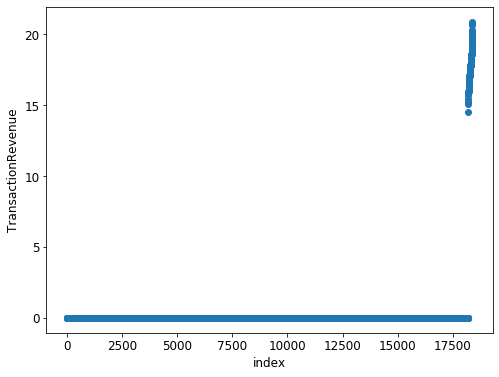

In [0]:
# Common imports
# Sum up the transaction revenue at user level and then do a scatter plot
import numpy as np

df_traingoogle["totals.transactionRevenue"] = df_traingoogle["totals.transactionRevenue"].astype('float')
gdf = df_traingoogle.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('index', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

In [0]:
# Utility functions for plots
def plotlybar(labels1 = None, values1 = None, name1 = None,labels2 = None, values2 = None, name2 =None, markercolor1 = '#9ECAE1', markercolor2 = '#ff99ff', title= None, mode = 'group', orientation = 'v'):
    trace1 = go.Bar(
    x = labels1,
    y = values1,
    orientation = orientation, 
    text = values1,
    name = name1,
    textposition = 'auto',
    marker=dict(
        color=markercolor1#'rgb(58,200,225)',
        )
    )    
    
    if labels2 is not None:
        trace2 = go.Bar(
            x = labels2,
            y = values2,
            name = name2,
            text = values2,
            textposition = 'auto',
            marker=dict(
                color=markercolor2#'rgb(58,200,225)',
            )
        )
        data = [trace1, trace2]
    
    else:
        data = [trace1]
    layout = go.Layout(title = title,xaxis=dict(tickangle=-25),
    barmode=mode)
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)
    
def scatter_plot(x,y, title):
    data = [go.Scatter(
    x = x,
    y = y,
    mode = 'lines+markers',
    name = 'lines+markers'
    )]
    layout = go.Layout(title = title,xaxis=dict(tickangle=-25))
    fig = go.Figure(data = data, layout = layout)
    iplot(fig)

In [0]:
# Data Preparation - Checking for missing data
total = df_traingoogle.isnull().sum().sort_values(ascending = True)
percent = (df_traingoogle.isnull().sum() / df_traingoogle.isnull().count() * 100).sort_values(ascending = True)
missing_data = pd.concat([total, percent], axis = 1, keys = ['Total','Percent'])
missing_data

,Total,Percent
channelGrouping,0,0.000
device.screenColors,0,0.000
device.screenResolution,0,0.000
geoNetwork.city,0,0.000
geoNetwork.cityId,0,0.000
geoNetwork.continent,0,0.000
geoNetwork.country,0,0.000
geoNetwork.longitude,0,0.000
geoNetwork.metro,0,0.000
geoNetwork.networkDomain,0,0.000


In [0]:
# List of features not including columns with null values
const_cols = [c for c in df_traingoogle.columns if df_traingoogle[c].nunique(dropna=False)==1 ]
const_cols

['socialEngagementType',
 'device.browserSize',
 'device.browserVersion',
 'device.flashVersion',
 'device.language',
 'device.mobileDeviceBranding',
 'device.mobileDeviceInfo',
 'device.mobileDeviceMarketingName',
 'device.mobileDeviceModel',
 'device.mobileInputSelector',
 'device.operatingSystemVersion',
 'device.screenColors',
 'device.screenResolution',
 'geoNetwork.cityId',
 'geoNetwork.latitude',
 'geoNetwork.longitude',
 'geoNetwork.networkLocation',
 'totals.visits',
 'trafficSource.adwordsClickInfo.criteriaParameters']

In [0]:
print("Number of unique visitors in train set : ",df_traingoogle.fullVisitorId.nunique(), " out of rows : ",df_traingoogle.shape[0])
print("Number of unique visitors in test set : ",df_testgoogle.fullVisitorId.nunique(), " out of rows : ",df_testgoogle.shape[0])
print("Number of common visitors in train and test set : ",len(set(df_traingoogle.fullVisitorId.unique()).intersection(set(df_testgoogle.fullVisitorId.unique())) ))

Number of unique visitors in train set :  18384  out of rows :  20000
Number of unique visitors in test set :  1855  out of rows :  2000
Number of common visitors in train and test set :  7


In [0]:
print("Variables not in test but in train : ", set(df_traingoogle.columns).difference(set(df_testgoogle.columns)))

Variables not in test but in train :  set()


In [0]:
#Development and validation splits based on time to build the model. We can take the last two months as validation sample.
# Impute 0 for missing target values

df_traingoogle["totals.transactionRevenue"].fillna(0, inplace=True)
train_y = df_traingoogle["totals.transactionRevenue"].values
train_id = df_traingoogle["fullVisitorId"].values
test_id = df_testgoogle["fullVisitorId"].values

In [0]:
from sklearn import preprocessing
import datetime
# Impute 0 for missing target values
df_traingoogle["totals.transactionRevenue"].fillna(0, inplace=True)
train_y = df_traingoogle["totals.transactionRevenue"].values
train_id = df_traingoogle["fullVisitorId"].values
test_id = df_testgoogle["fullVisitorId"].values


# label encode the categorical variables and convert the numerical variables to float
cat_cols = ["channelGrouping", "device.browser", 
            "device.deviceCategory", "device.operatingSystem", 
            "geoNetwork.city", "geoNetwork.continent", 
            "geoNetwork.country", "geoNetwork.metro",
            "geoNetwork.networkDomain", "geoNetwork.region", 
            "geoNetwork.subContinent", "trafficSource.adContent", 
            "trafficSource.adwordsClickInfo.adNetworkType", 
            "trafficSource.adwordsClickInfo.gclId", 
            "trafficSource.adwordsClickInfo.page", 
            "trafficSource.adwordsClickInfo.slot", "trafficSource.campaign",
            "trafficSource.keyword", "trafficSource.medium", 
            "trafficSource.referralPath", "trafficSource.source",
            'trafficSource.adwordsClickInfo.isVideoAd', 'trafficSource.isTrueDirect']
for col in cat_cols:
    print(col)
    lbl = preprocessing.LabelEncoder()
    lbl.fit(list(df_traingoogle[col].values.astype('str')) + list(df_testgoogle[col].values.astype('str')))
    df_traingoogle[col] = lbl.transform(list(df_traingoogle[col].values.astype('str')))
    df_testgoogle[col] = lbl.transform(list(df_testgoogle[col].values.astype('str')))


num_cols = ["totals.hits", "totals.pageviews", "visitNumber", "visitStartTime", 'totals.bounces',  'totals.newVisits']    
for col in num_cols:
    df_traingoogle[col] = df_traingoogle[col].astype(float)
    df_testgoogle[col] = df_testgoogle[col].astype(float)

# Split the train dataset into development and values based on time 
df_traingoogle['date'] = df_traingoogle['date'].astype('datetime64[ns]')

dev_df = df_traingoogle[df_traingoogle['date'] <= datetime.date(2017,5,31)]
val_df = df_traingoogle[df_traingoogle['date'] <= datetime.date(2017,5,31)]
dev_y = np.log1p(dev_df["totals.transactionRevenue"].values)
val_y = np.log1p(val_df["totals.transactionRevenue"].values)

dev_X = dev_df[cat_cols + num_cols] 
val_X = val_df[cat_cols + num_cols] 
test_X = df_testgoogle[cat_cols + num_cols] 

channelGrouping
device.browser
device.deviceCategory
device.operatingSystem
geoNetwork.city
geoNetwork.continent
geoNetwork.country
geoNetwork.metro
geoNetwork.networkDomain
geoNetwork.region
geoNetwork.subContinent
trafficSource.adContent
trafficSource.adwordsClickInfo.adNetworkType
trafficSource.adwordsClickInfo.gclId
trafficSource.adwordsClickInfo.page
trafficSource.adwordsClickInfo.slot
trafficSource.campaign
trafficSource.keyword
trafficSource.medium
trafficSource.referralPath
trafficSource.source
trafficSource.adwordsClickInfo.isVideoAd
trafficSource.isTrueDirect


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:40: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:41: FutureWarning:

Comparing Series of datetimes with 'datetime.date'.  Currently, the
'datetime.date' is coerced to a datetime. In the future pandas will
not coerce, and a TypeError will be raised. To retain the current
behavior, convert the 'datetime.date' to a datetime with
'pd.Timestamp'.



In [0]:
# custom function to run light gbm model
import lightgbm as lgb
def run_lgb(train_X, train_y, val_X, val_y, test_X):
    params = {
        "objective" : "regression",
        "metric" : "rmse", 
        "num_leaves" : 30,
        "min_child_samples" : 100,
        "learning_rate" : 0.1,
        "bagging_fraction" : 0.7,
        "feature_fraction" : 0.5,
        "bagging_frequency" : 5,
        "bagging_seed" : 2018,
        "verbosity" : -1
    }
    
    lgtrain = lgb.Dataset(train_X, label=train_y)
    lgval = lgb.Dataset(val_X, label=val_y)
    model = lgb.train(params, lgtrain, 1000, valid_sets=[lgval], early_stopping_rounds=100, verbose_eval=100)
    
    pred_test_y = model.predict(test_X, num_iteration=model.best_iteration)
    pred_val_y = model.predict(val_X, num_iteration=model.best_iteration)
    return pred_test_y, model, pred_val_y

# Training the model #
pred_test, model, pred_val = run_lgb(dev_X, dev_y, val_X, val_y, test_X)

Training until validation scores don't improve for 100 rounds.
[100]	valid_0's rmse: 1.37996
[200]	valid_0's rmse: 1.30609
[300]	valid_0's rmse: 1.25497
[400]	valid_0's rmse: 1.20855
[500]	valid_0's rmse: 1.16836
[600]	valid_0's rmse: 1.13322
[700]	valid_0's rmse: 1.09874
[800]	valid_0's rmse: 1.06806
[900]	valid_0's rmse: 1.03946
[1000]	valid_0's rmse: 1.0131
Did not meet early stopping. Best iteration is:
[1000]	valid_0's rmse: 1.0131


In [0]:
from sklearn import metrics
import numpy as np
import statsmodels
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

pred_val[pred_val<0] = 0

val_pred_df = pd.DataFrame({"fullVisitorId":val_df["fullVisitorId"].values})
val_pred_df["transactionRevenue"] = val_df["totals.transactionRevenue"].values
val_pred_df["PredictedRevenue"] = np.expm1(pred_val)

#print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))
val_pred_df = val_pred_df.groupby("fullVisitorId")["transactionRevenue", "PredictedRevenue"].sum().reset_index()
print(np.sqrt(metrics.mean_squared_error(np.log1p(val_pred_df["transactionRevenue"].values), np.log1p(val_pred_df["PredictedRevenue"].values))))

1.0221037440214709


In [0]:
sub_df = pd.DataFrame({"fullVisitorId":test_id})
pred_test[pred_test<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_test)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv("baseline_lgb.csv", index=False)

In [0]:
sub_df.head()

,fullVisitorId,PredictedLogRevenue
0,2037789921357424,0.684842
1,2201938260490877,9.419046
2,3809040884259760,0.000000
3,5775569756141586,0.000000
4,6948037456238434,1.491046


In [0]:
from google.colab import files
files.download('baseline_lgb.csv') 